# **Fully automated** modeling of a lensed quasar

## Setting up the 

Setting up `dolphin`:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
        - **masks**: contains the custom 'mask_{lens_name}_{band}.npy' files (optional),
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_error_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Imports

In [1]:
from dolphin.processor import Processor
from dolphin.analysis import Output
from dolphin.ai import Vision
from dolphin.ai import Modeler

import matplotlib.pyplot as plt
import numpy as np

## Run the automated model

In [ ]:
io_directory_path = "../io_directory_example/"
lens_name = "lensed_quasar"
band = "F814W"

vision = Vision(io_directory_path=io_directory_path, source_type="quasar")
segementation = vision.create_segmentation_for_single_lens(lens_name, band)
# above line will save the segmentation result in output/semantic_segmentation_lensed_quasar_F814W.npy

modeler = Modeler(io_directory_path=io_directory_path)
modeler.create_config_for_single_lens(lens_name, band)
# above line will save the config file in settings/config_lensed_quasar.yml and a mask in 
# output/masks/mask_lensed_quasar_F814W.npy

processor = Processor(io_directory_path)
processor.swim(lens_name=lens_name, model_id="example", log=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Optimizing model for lensed_quasar with recipe: default.
Computing the PSO ...


  0%|          | 0/50 [00:00<?, ?it/s]/Users/ajshajib/software_development/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:96: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  x = scipy.optimize.fsolve(
/Users/ajshajib/software_development/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:96: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  x = scipy.optimize.fsolve(
100%|██████████| 50/50 [02:04<00:00,  2.50s/it]


Max iteration reached! Stopping.
-0.992140835911778 reduced X^2 of best position
-2045.7944036500862 log likelihood
4124 effective number of data points
[{'theta_E': 0.7036317420362426, 'gamma': 2.0, 'e1': -0.0038865237554875547, 'e2': 0.11987836780313255, 'center_x': -0.14735772315954285, 'center_y': 0.0740552277274827}, {'gamma_ext': 0.04395131678805929, 'psi_ext': 0.5556579447392531, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.3659060021389289, 'n_sersic': 2.446073932428733, 'e1': -0.07013847705589821, 'e2': 0.02663706218974666, 'center_x': -0.13896811637283857, 'center_y': 0.08952256221709151}] source result
[{'amp': 1, 'R_sersic': 0.22404173222391852, 'n_sersic': 4.0, 'e1': -0.0406150105345424, 'e2': 0.0762784814782967, 'center_x': -0.17778989644211582, 'center_y': 0.06399774128684582}] lens light result
[{'ra_image': array([-0.53429714,  0.53254999, -0.67764561,  0.19794881]), 'dec_image': array([-0.48870213, -0.15726352,  0.53418899,  0.68783626]), 'point_amp':

100%|██████████| 50/50 [02:05<00:00,  2.51s/it]


Max iteration reached! Stopping.
-0.8354984813113615 reduced X^2 of best position
-1722.7978684640275 log likelihood
4124 effective number of data points
[{'theta_E': 0.7043619567959462, 'gamma': 2.0, 'e1': -0.01066501444671545, 'e2': 0.13467114405721162, 'center_x': -0.1517634703232317, 'center_y': 0.0736803698978762}, {'gamma_ext': 0.04520432055102319, 'psi_ext': 0.5566172804018895, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.3648953543334155, 'n_sersic': 3.9196453875779445, 'e1': -0.05302847439482925, 'e2': -0.062029067710904454, 'center_x': -0.14148052970991054, 'center_y': 0.0915062222440598}] source result
[{'amp': 1, 'R_sersic': 0.3044213088179272, 'n_sersic': 4.0, 'e1': -0.03401003981716647, 'e2': 0.0754636558856859, 'center_x': -0.17300864516558503, 'center_y': 0.07016850083949489}] lens light result
[{'ra_image': array([-0.53349955,  0.5336397 , -0.68320523,  0.19322683]), 'dec_image': array([-0.48509931, -0.15500517,  0.53647655,  0.68675972]), 'point_amp':

100%|██████████| 50/50 [01:48<00:00,  2.17s/it]


Max iteration reached! Stopping.
-0.8303232677037442 reduced X^2 of best position
-1712.1265780051206 log likelihood
4124 effective number of data points
[{'theta_E': 0.7038570349295213, 'gamma': 2.0, 'e1': -0.009065857650279535, 'e2': 0.1289005115001854, 'center_x': -0.15177600054035564, 'center_y': 0.07461298262335611}, {'gamma_ext': 0.04285876765636947, 'psi_ext': 0.53637398345358, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.49867060668926405, 'n_sersic': 3.9526247419838074, 'e1': -0.05191196199002708, 'e2': -0.06473157590177675, 'center_x': -0.1415024362206474, 'center_y': 0.09194957486248898}] source result
[{'amp': 1, 'R_sersic': 0.32991864350328143, 'n_sersic': 4.0, 'e1': -0.028278266971138947, 'e2': 0.0750782909121135, 'center_x': -0.1732116055040442, 'center_y': 0.06956406045620252}] lens light result
[{'ra_image': array([-0.53240705,  0.53323409, -0.68357262,  0.19288298]), 'dec_image': array([-0.48428643, -0.15507964,  0.53791755,  0.68674847]), 'point_amp'

100%|██████████| 50/50 [01:54<00:00,  2.30s/it]


Max iteration reached! Stopping.
-0.8277959094701695 reduced X^2 of best position
-1706.5012673727542 log likelihood
4123 effective number of data points
[{'theta_E': 0.7054254421530626, 'gamma': 2.0113741733397728, 'e1': -0.020299099731044098, 'e2': 0.14819002122987623, 'center_x': -0.15346142624040207, 'center_y': 0.0728232470190362}, {'gamma_ext': 0.04682284474123545, 'psi_ext': 0.6058232832595972, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.49883308711390906, 'n_sersic': 4.494865213984053, 'e1': -0.047147632517239864, 'e2': -0.11276150091363907, 'center_x': -0.14291292882723572, 'center_y': 0.09196751049969049}] source result
[{'amp': 1, 'R_sersic': 0.34091587531882844, 'n_sersic': 4.0, 'e1': -0.022289549019692764, 'e2': 0.10846021529994573, 'center_x': -0.1728341282276222, 'center_y': 0.06744854708085493}] lens light result
[{'ra_image': array([-0.53314441,  0.53297982, -0.68376206,  0.19275423]), 'dec_image': array([-0.48585637, -0.15440293,  0.53731857,  0.6869

100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


Max iteration reached! Stopping.
-0.8267332697813913 reduced X^2 of best position
-1704.310635654338 log likelihood
4123 effective number of data points
[{'theta_E': 0.7052768458817162, 'gamma': 2.0108088451664545, 'e1': -0.01620815202338861, 'e2': 0.14164810283074264, 'center_x': -0.1529223210488215, 'center_y': 0.0734164580407013}, {'gamma_ext': 0.045461172023204405, 'psi_ext': 0.5826822667148766, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.4990255602369292, 'n_sersic': 4.479985610086023, 'e1': -0.046869099815625, 'e2': -0.11417653719571355, 'center_x': -0.14245417852749626, 'center_y': 0.09186894335377019}] source result
[{'amp': 1, 'R_sersic': 0.36175906779494615, 'n_sersic': 4.0, 'e1': -0.012370330575576544, 'e2': 0.10858694394965723, 'center_x': -0.17318407274309244, 'center_y': 0.06761551375996712}] lens light result
[{'ra_image': array([-0.53362359,  0.53327905, -0.68419601,  0.19246268]), 'dec_image': array([-0.48578878, -0.15477113,  0.53724911,  0.68759934]

100%|██████████| 50/50 [02:09<00:00,  2.60s/it]


Max iteration reached! Stopping.
-0.8266189938106042 reduced X^2 of best position
-1704.0750557405606 log likelihood
4123 effective number of data points
[{'theta_E': 0.7053679432325906, 'gamma': 2.011136745063678, 'e1': -0.016302452165623416, 'e2': 0.14151842270860593, 'center_x': -0.15263308031895534, 'center_y': 0.07348492795735873}, {'gamma_ext': 0.04532438425359672, 'psi_ext': 0.5826673960872875, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.49996299303999425, 'n_sersic': 4.508353262269658, 'e1': -0.04693480404290765, 'e2': -0.1152078774093484, 'center_x': -0.1421551525916308, 'center_y': 0.09189556708462686}] source result
[{'amp': 1, 'R_sersic': 0.3720069764445219, 'n_sersic': 4.0, 'e1': -0.01169678317146934, 'e2': 0.10869523594623087, 'center_x': -0.17320138890626174, 'center_y': 0.06762236871126813}] lens light result
[{'ra_image': array([-0.53342348,  0.53362676, -0.68397128,  0.19261666]), 'dec_image': array([-0.48575006, -0.15488705,  0.53742197,  0.68781612

  4%|▍         | 4/100 [00:07<02:59,  1.87s/it]/Users/ajshajib/software_development/lenstronomy/lenstronomy/LensModel/Profiles/epl.py:300: RuntimeWarning: invalid value encountered in power
  alpha = 2 / (1 + q) * (b / R) ** t * R_omega
100%|██████████| 100/100 [03:40<00:00,  2.21s/it]

Computing the MCMC...
Number of walkers =  40
Burn-in iterations:  0
Sampling iterations (in current run): 100
222.9500560760498 time taken for MCMC sampling


## Let's check the output

-0.8245188264009408 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8245188264009407


/Users/ajshajib/software_development/lenstronomy/lenstronomy/Plots/model_band_plot.py:67: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/ajshajib/software_development/lenstronomy/lenstronomy/Plots/model_band_plot.py:160: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/ajshajib/software_development/lenstronomy/lenstronomy/Plots/model_band_plot.py:224: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


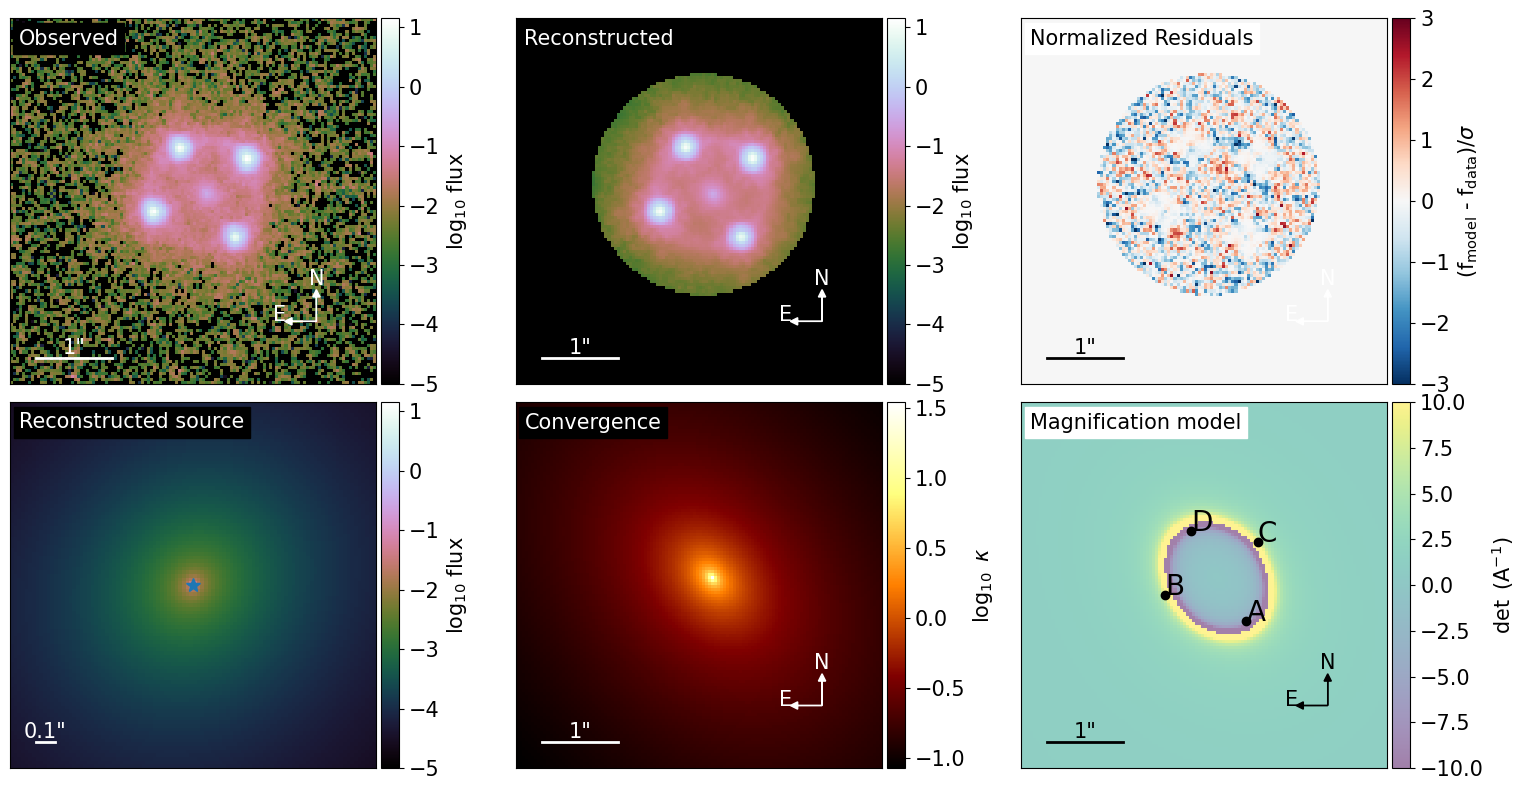

In [ ]:
output = Output("../io_directory_example/")

fig = output.plot_model_overview(lens_name="lensed_quasar", model_id="example")

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

## Let's check the segmentation result as a demonstration

/var/folders/ry/23z2z0bd7_d814t1jlq8ydlw0000gn/T/ipykernel_28912/2942076431.py:5: RuntimeWarning: invalid value encountered in log10
  axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
/var/folders/ry/23z2z0bd7_d814t1jlq8ydlw0000gn/T/ipykernel_28912/2942076431.py:15: RuntimeWarning: invalid value encountered in log10
  axes[2].imshow(np.log10(image), origin="lower", cmap="cubehelix")


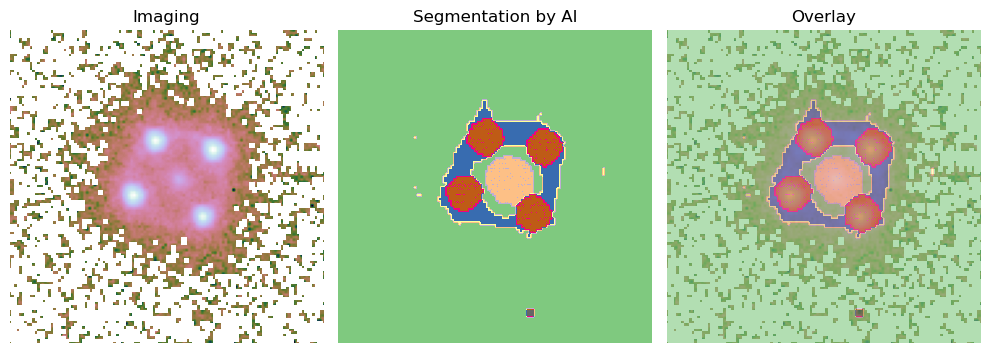

In [4]:
image = vision.get_image_data(lens_name, band).get_image()

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[0].set_title("Imaging")
axes[0].axis("off")

cmap = "Accent"
# use qualitaive cmap for the segmentation plot
axes[1].imshow(segementation, origin="lower", cmap=cmap)
axes[1].set_title("Segmentation by AI")
axes[1].axis("off")

axes[2].imshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[2].imshow(segementation, origin="lower", cmap=cmap, alpha=0.6)
axes[2].set_title("Overlay")
axes[2].axis("off")

fig.tight_layout()

## Let's check the automatically generated config file as a demonstration

In [5]:
output.get_lens_config(lens_name="lensed_quasar").settings

{'lens_name': 'lensed_quasar',
 'band': ['F814W'],
 'model': {'lens': ['EPL', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE'],
  'source_light': ['SERSIC_ELLIPSE'],
  'point_source': ['LENSED_POSITION']},
 'lens_option': {'centroid_init': [-0.20010800040962673, 0.03992600620768183],
  'centroid_bound': 0.2},
 'lens_light_option': {'fix': {0: {'n_sersic': 4.0}}},
 'source_light_option': {'n_max': [4]},
 'point_source_option': {'ra_init': [-0.5600833942543342,
   0.5203015179332511,
   -0.720542698210012,
   0.19982684291234332],
  'dec_init': [-0.4802068568093931,
   -0.15980758532019257,
   0.55973339340072,
   0.7200735755238816],
  'bound': 0.2},
 'numeric_option': {'supersampling_factor': [2]},
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 50, 'num_iteration': 50},
  'psf_iteration': True,
  'psf_iteration_settings': {'stacking_method': 'median',
   'num_iter': 20,
   'psf_iter_factor': 0.5,
   'keep_psf_error_map': True,
   'psf_symmetry': 4,
   'block_center_